In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [18]:
df=pd.read_csv('../datasets/kaggle_data_transfromed.csv')
df.head()

,Age,Sleep Duration,Work/Study Hours,Financial Stress,Dietary Habits,Depression,Academic/Work Pressure,Study/Job Satisfaction,Age_Group,Gender_Male,Working Professional or Student_Working Professional,Suicidal Thoughts_Yes,Family Mental Illness History_Yes,Study Degree_High School,Study Degree_Master’s Degree,Study Degree_PhD,Study Degree_Unknown,Profession_Architect,Profession_Business Analyst,Profession_Chef,Profession_Chemist,Profession_Civil Engineer,Profession_Consultant,Profession_Content Writer,Profession_Customer Support,Profession_Data Scientist,Profession_Digital Marketer,Profession_Doctor,Profession_Educational Consultant,Profession_Electrician,Profession_Entrepreneur,Profession_Financial Analyst,Profession_Graphic Designer,Profession_HR Manager,Profession_Investment Banker,Profession_Judge,Profession_Lawyer,Profession_Manager,Profession_Marketing Manager,Profession_Mechanical Engineer,Profession_Pharmacist,Profession_Pilot,Profession_Plumber,Profession_Research Analyst,Profession_Researcher,Profession_Sales Executive,Profession_Software Engineer,Profession_Student,Profession_Teacher,Profession_Travel Consultant,Profession_UX/UI Designer,Profession_Unknown
0,49.000,3,1.000,2,0,0,5,2,10,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,26.000,2,7.000,3,2,1,4,3,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,33.000,0,3.000,1,0,1,5,2,5,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,22.000,2,10.000,1,1,1,5,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,30.000,0,9.000,4,2,0,1,1,4,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140624 entries, 0 to 140623
Data columns (total 52 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Age                                                   140624 non-null  float64
 1   Sleep Duration                                        140624 non-null  int64  
 2   Work/Study Hours                                      140624 non-null  float64
 3   Financial Stress                                      140624 non-null  int64  
 4   Dietary Habits                                        140624 non-null  int64  
 5   Depression                                            140624 non-null  int64  
 6   Academic/Work Pressure                                140624 non-null  int64  
 7   Study/Job Satisfaction                                140624 non-null  int64  
 8   Age_Group                                   

In [20]:
X = df.drop('Depression',axis=1)
y = df['Depression']


In [21]:
# Create the dictionary to store the metrics
model_metrics = {
    'Model': [],
    'Train Accuracy': [],
    'Train Precision': [],
    'Train Recall': [],
    'Train F1 Score': [],
    'Train ROC AUC': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Test ROC AUC': []
}
# Function to add metrics to the dictionary
def add_metrics_to_dict(model_name, train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                        test_accuracy, test_precision, test_recall, test_f1, test_roc_auc):
    model_metrics['Model'].append(model_name)
    model_metrics['Train Accuracy'].append(round(train_accuracy, 3))
    model_metrics['Train Precision'].append(round(train_precision, 3))
    model_metrics['Train Recall'].append(round(train_recall, 3))
    model_metrics['Train F1 Score'].append(round(train_f1, 3))
    model_metrics['Train ROC AUC'].append(round(train_roc_auc, 3))
    model_metrics['Test Accuracy'].append(round(test_accuracy, 3))
    model_metrics['Test Precision'].append(round(test_precision, 3))
    model_metrics['Test Recall'].append(round(test_recall, 3))
    model_metrics['Test F1 Score'].append(round(test_f1, 3))
    model_metrics['Test ROC AUC'].append(round(test_roc_auc, 3))

# I. Training

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Trying Multiple Models

# 1. Gradient Boosting Models

### CatBoost


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23017
           1       0.84      0.82      0.83      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.89      0.90     28125
weighted avg       0.94      0.94      0.94     28125



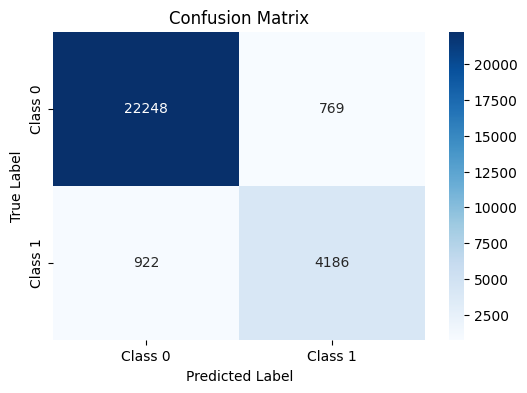

In [23]:
from catboost import CatBoostClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the CatBoostClassifier model
model_cat = CatBoostClassifier(random_seed=42, verbose=0)  

# Perform cross-validation
cv_scores = cross_val_score(model_cat, X_train, y_train, cv=5, scoring='roc_auc') 

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_train_pred = model_cat.predict(X_train)
y_test_pred = model_cat.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, model_cat.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, model_cat.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Add metrics to the dictionary
add_metrics_to_dict('CatBoost', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)

### XGBoost



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     23017
           1       0.83      0.82      0.83      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.89      0.89     28125
weighted avg       0.94      0.94      0.94     28125



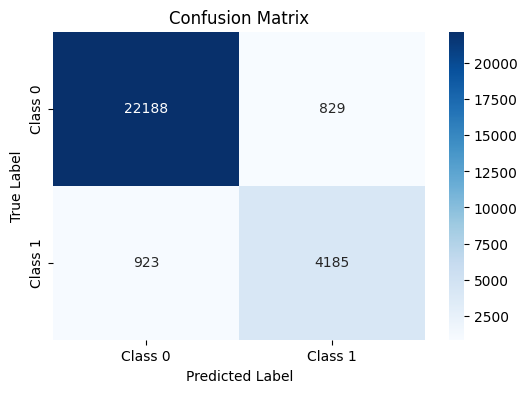

In [24]:
from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the XGBClassifier model
model_xg = XGBClassifier(random_state=42, eval_metric='logloss')

# Perform cross-validation
cv_scores = cross_val_score(model_xg, X_train, y_train, cv=5, scoring='roc_auc')  # Use 'roc_auc' to evaluate based on the Area Under the Curve

# Train the model
model_xg.fit(X_train, y_train)

# Make predictions
y_train_pred = model_xg.predict(X_train)
y_test_pred = model_xg.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, model_xg.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, model_xg.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Add metrics to the dictionary
add_metrics_to_dict('XGBoost', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)

# 2. Logistic Regression



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23017
           1       0.84      0.81      0.82      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.89      0.89     28125
weighted avg       0.94      0.94      0.94     28125



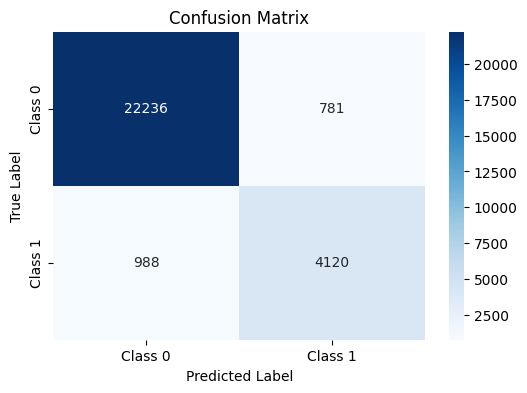

In [25]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Logistic Regression model
model_lr = LogisticRegression(random_state=42, max_iter=1000)  

# Perform cross-validation
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='roc_auc')  

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, model_lr.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Add metrics to the dictionary
add_metrics_to_dict('Logistic Regression', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)

# 3. Random Forest


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23017
           1       0.84      0.80      0.82      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.88      0.89     28125
weighted avg       0.93      0.94      0.93     28125



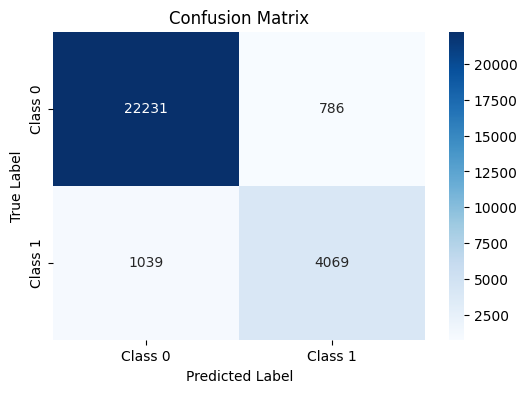

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest Classifier model
model_rf = RandomForestClassifier(random_state=42)  # Default with 100 trees

# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='roc_auc')  # Use 'roc_auc' for evaluation

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions
y_train_pred = model_rf.predict(X_train)
y_test_pred = model_rf.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, model_rf.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Add metrics to the dictionary
add_metrics_to_dict('Random Forest', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)

In [27]:
df_metrics = pd.DataFrame(model_metrics)
pd.set_option('display.float_format', '{:.3f}'.format)
df_metrics


,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train ROC AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC AUC
0,CatBoost,0.950,0.950,0.950,0.950,0.984,0.940,0.939,0.940,0.940,0.974
1,XGBoost,0.948,0.948,0.948,0.948,0.984,0.938,0.937,0.938,0.937,0.973
2,Logistic Regression,0.937,0.936,0.937,0.937,0.974,0.937,0.936,0.937,0.937,0.973
3,Random Forest,1.000,1.000,1.000,1.000,1.000,0.935,0.934,0.935,0.934,0.970


### Key Observations:

CatBoost Performs the Best:

CatBoost has the highest Test Accuracy (0.940), Test ROC AUC (0.974), and Test F1 Score (0.940).
It generalizes better on the test set compared to the other models.

XGBoost and Logistic Regression Are Competitive:

Both models perform very similarly, with XGBoost slightly ahead on the Test ROC AUC and Precision compared to Logistic Regression.
They both avoid overfitting and deliver balanced performance.




Random Forest is Overfitting:

Train Accuracy = 1.000 and Train ROC AUC = 1.000, which means the Random Forest model is perfectly fitting the training data.
However, its Test Accuracy (0.935) and Test ROC AUC (0.970) are lower than CatBoost and XGBoost, highlighting overfitting and reduced generalization.

Random Forest Falls Short:

Despite high training metrics, the Test ROC AUC and F1-Score are lower, confirming that it is less reliable for unseen data.

### Final Conclusion:

CatBoost remains the best model overall, achieving the best balance between Recall, Precision, and ROC AUC.
XGBoost and Logistic Regression are excellent alternatives if computational cost or interpretability is a concern.
Random Forest should be tuned further (e.g., with hyperparameter optimization or pruning) to reduce overfitting.

# Hyper parametres tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1.Gradient Boosting Models

### CatBoost

In [30]:
param_dist = {
    'iterations': [100, 200, 300], 
    'learning_rate': [0.01, 0.05, 0.1, 0.2], 
    'depth': [4, 6, 8, 10],  
    'l2_leaf_reg': [1, 3, 5, 7],  
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bylevel': [0.7, 0.8, 1.0]  
}

model_cat = CatBoostClassifier(random_seed=42, verbose=0)

random_search_cat = RandomizedSearchCV(
    estimator=model_cat,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,  
    scoring='roc_auc',  
    random_state=42,
    n_jobs=-1  
)

# Fit the model using RandomizedSearchCV
random_search_cat.fit(X_train, y_train)

best_params = random_search_cat.best_params_
print("\nBest Parameters from RandomizedSearchCV:")
print(best_params)

# Make predictions using the best model
y_train_pred = random_search_cat.predict(X_train)
y_test_pred = random_search_cat.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, random_search_cat.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, random_search_cat.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Add metrics to the dictionary
add_metrics_to_dict('CatBoost with RandomizedSearchCV', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)



Best Parameters from RandomizedSearchCV:
{'subsample': 1.0, 'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 300, 'depth': 4, 'colsample_bylevel': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23017
           1       0.85      0.82      0.83      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.89      0.90     28125
weighted avg       0.94      0.94      0.94     28125



### XGBoost

In [31]:
param_dist = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 6, 8, 10],  
    'min_child_weight': [1, 3, 5], 
    'subsample': [0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0], 
    'gamma': [0, 0.1, 0.2, 0.3]  
}

model_xgb = XGBClassifier(random_state=42, eval_metric='logloss')

random_search_xgb = RandomizedSearchCV(
    estimator=model_xgb,
    param_distributions=param_dist,
    n_iter=20,  
    cv=5,  
    scoring='roc_auc',  
    random_state=42,
    n_jobs=-1  
)

# Fit the model using RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

best_params = random_search_xgb.best_params_
print("\nBest Parameters from RandomizedSearchCV:")
print(best_params)

# Make predictions using the best model
y_train_pred = random_search_xgb.predict(X_train)
y_test_pred = random_search_xgb.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, random_search_xgb.predict_proba(X_train)[:, 1], multi_class="ovr")

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, random_search_xgb.predict_proba(X_test)[:, 1], multi_class="ovr")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Add metrics to the dictionary (make sure this function exists or replace with your logic)
add_metrics_to_dict('XGBoost with RandomizedSearchCV', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)



Best Parameters from RandomizedSearchCV:
{'subsample': 0.9, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.7}

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     23017
           1       0.85      0.82      0.83      5108

    accuracy                           0.94     28125
   macro avg       0.90      0.89      0.90     28125
weighted avg       0.94      0.94      0.94     28125



# 2.Logestic Regression 

In [33]:
import numpy as np
param_dist = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 1000, 5000]
}

# Initialize the Logistic Regression model with class weight handling
model_lr = LogisticRegression(random_state=42, class_weight='balanced')

# Initialize RandomizedSearchCV with roc_auc as the scoring metric
random_search = RandomizedSearchCV(
    estimator=model_lr,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='roc_auc', 
    random_state=42,
    n_jobs=-1
)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model_lr = random_search.best_estimator_
best_params = random_search.best_params_
print("\nBest Parameters from RandomizedSearchCV:")
print(best_params)

# Predictions on training and test sets
y_train_pred = best_model_lr.predict(X_train)
y_test_pred = best_model_lr.predict(X_test)

# Evaluate performance on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')
train_roc_auc = roc_auc_score(y_train, best_model_lr.predict_proba(X_train)[:, 1])

# Evaluate performance on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')
test_roc_auc = roc_auc_score(y_test, best_model_lr.predict_proba(X_test)[:, 1])

# Add metrics to the dictionary
add_metrics_to_dict('Logistic Regression with RandomizedSearchCV', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)



Best Parameters from RandomizedSearchCV:
{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 1000, 'C': 2.782559402207126}


# 3.Random Forest

In [35]:
param_dist_rf = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 50, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None],  
    'bootstrap': [True, False] 
}

model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

random_search_rf = RandomizedSearchCV(
    estimator=model_rf,
    param_distributions=param_dist_rf,
    n_iter=20,  
    cv=5,  
    scoring='roc_auc',  
    random_state=42,
    n_jobs=-1  
)
# Fit the model using RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

best_model_rf = random_search_rf.best_estimator_
best_params_rf = random_search_rf.best_params_
print("\nBest Parameters from Randomized Search CV (Random Forest):")
print(best_params_rf)

# Predictions on training and test sets
y_train_pred_rf = best_model_rf.predict(X_train)
y_test_pred_rf = best_model_rf.predict(X_test)

# Evaluate performance on training set
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf, average='weighted')
train_recall_rf = recall_score(y_train, y_train_pred_rf, average='weighted')
train_f1_rf = f1_score(y_train, y_train_pred_rf, average='weighted')
train_roc_auc_rf = roc_auc_score(y_train, best_model_rf.predict_proba(X_train)[:, 1])

# Evaluate performance on test set
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf = precision_score(y_test, y_test_pred_rf, average='weighted')
test_recall_rf = recall_score(y_test, y_test_pred_rf, average='weighted')
test_f1_rf = f1_score(y_test, y_test_pred_rf, average='weighted')
test_roc_auc_rf = roc_auc_score(y_test, best_model_rf.predict_proba(X_test)[:, 1])

# Add metrics to the dictionary
add_metrics_to_dict('Random Forest with RandomizedSearchCV', train_accuracy, train_precision, train_recall, train_f1, train_roc_auc,
                    test_accuracy, test_precision, test_recall, test_f1, test_roc_auc)



Best Parameters from Randomized Search CV (Random Forest):
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


# Model Evaluation

In [36]:
df_metrics = pd.DataFrame(model_metrics)
df_metrics.to_csv("model_metrics.csv", index=False)
pd.set_option('display.float_format', '{:.3f}'.format)
df_metrics


,Model,Train Accuracy,Train Precision,Train Recall,Train F1 Score,Train ROC AUC,Test Accuracy,Test Precision,Test Recall,Test F1 Score,Test ROC AUC
0,CatBoost,0.950,0.950,0.950,0.950,0.984,0.940,0.939,0.940,0.940,0.974
1,XGBoost,0.948,0.948,0.948,0.948,0.984,0.938,0.937,0.938,0.937,0.973
2,Logistic Regression,0.937,0.936,0.937,0.937,0.974,0.937,0.936,0.937,0.937,0.973
3,Random Forest,1.000,1.000,1.000,1.000,1.000,0.935,0.934,0.935,0.934,0.970
4,CatBoost with RandomizedSearchCV,0.941,0.941,0.941,0.941,0.977,0.940,0.939,0.940,0.940,0.975
5,XGBoost with RandomizedSearchCV,0.942,0.941,0.942,0.941,0.977,0.940,0.939,0.940,0.939,0.975
6,Logistic Regression with RandomizedSearchCV,0.914,0.931,0.914,0.919,0.974,0.912,0.929,0.912,0.916,0.973
7,Random Forest with RandomizedSearchCV,0.914,0.931,0.914,0.919,0.974,0.912,0.929,0.912,0.916,0.973


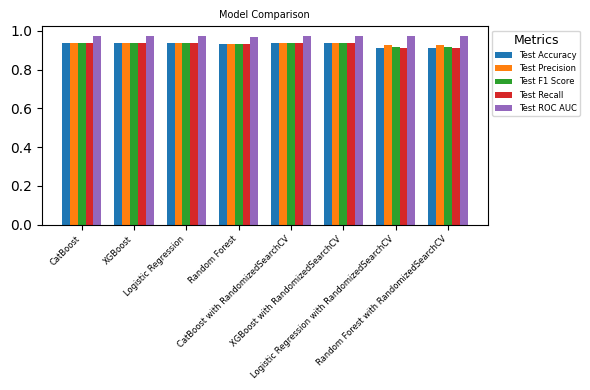

In [52]:
metrics = ["Test Accuracy", "Test Precision", "Test F1 Score", "Test Recall", "Test ROC AUC"]
x = np.arange(len(df_metrics['Model']))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))

# Add bars for each metric with labels
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, df_metrics[metric], width, label=metric)

ax.set_title("Model Comparison", fontsize=7)
ax.set_xticks(x + width * 2)
ax.set_xticklabels(df_metrics["Model"], rotation=45, ha="right", fontsize=6)
ax.legend(title="Metrics", loc="upper left", bbox_to_anchor=(1, 1), fontsize=6, title_fontsize=9)

# Adjust layout
plt.tight_layout()
plt.show()


- Still the CatBoost model is the best model for our problem.

### Save the CatBoost model

In [37]:
# Save the model to a file
best_model = random_search_cat.best_estimator_
best_model.save_model("catboost_model.cbm")
